<a href="https://colab.research.google.com/github/MVFran/PyTorchForDeepLearning/blob/master/RedNeuronalSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [28]:
# Creamos una clase que hereda nn.Module

class Model(nn.Module):
  def __init__(self, caracteristicas = 4, h1 = 8, h2 = 8, salida = 3): #En la capa de entrada se añaden las 4 caracteristicas de las flores
    super().__init__()                                                 #Para la primera y segunda capa se tienen 8 neuronas
    self.fc1 = nn.Linear(caracteristicas, h1)                          #A la salida se da una de las 3 posibles clasificaciones
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, salida)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [29]:
# Escogemos una semilla para que al ejecutar el modelo en diversas ocasiones se obtenga el mismo resultado
torch.manual_seed(18012025)
model = Model()

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [31]:
# Vamos a entrenar el modelo utilizando el dataset "Iris"
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
# Cambiamos la última columna por números según la especie setosa = 0, versicolor = 1, viginica = 2,
df["species"] = df["species"].replace("setosa", 0)
df["species"] = df["species"].replace("versicolor", 1)
df["species"] = df["species"].replace("virginica", 2)
df.tail()

<ipython-input-32-8b0208c7e151>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["species"] = df["species"].replace("virginica", 2)


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [33]:
# Definimos X, y para el entrenamiento
X = df.drop("species", axis = 1)
y = df["species"]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
# Los convertimos en arreglos de numpy
X = X.values
y = y.values

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Defimimos los valores para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

In [37]:
# Convertimos a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [38]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [39]:
# Establecemos el criterio para medir el error del modelo
# i.e. que tan lejos están las predicciones del valor real
criterion = nn.CrossEntropyLoss()
# Elegimos además el optimizador y la taza de aprendizaje
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [40]:
# Antes del entrenamiento definimos las epocas
epochs = 120
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train) # Se realiza una predicción
  loss = criterion(y_pred, y_train) # Se establece la perdida
  losses.append(loss.detach().numpy())

  if i % 10 == 0:   # Imprimimos los valores cada 10 epocas
    print(f"Epoch: {i}, loss: {loss}")

  # Backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, loss: 1.1201239824295044
Epoch: 10, loss: 1.043135166168213
Epoch: 20, loss: 0.884141743183136
Epoch: 30, loss: 0.6281128525733948
Epoch: 40, loss: 0.46914371848106384
Epoch: 50, loss: 0.39556312561035156
Epoch: 60, loss: 0.3213948905467987
Epoch: 70, loss: 0.2382374107837677
Epoch: 80, loss: 0.1647699624300003
Epoch: 90, loss: 0.11805125325918198
Epoch: 100, loss: 0.09370356053113937
Epoch: 110, loss: 0.08057598024606705


Text(0.5, 0, 'Epochs')

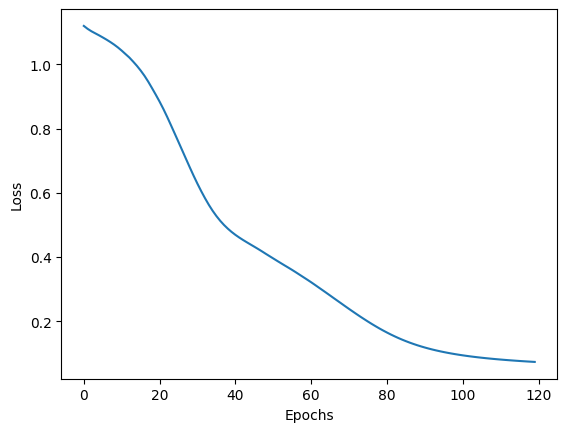

In [41]:
# Graficamos el desempeño
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [42]:
# Ahora, vamos a evaluar el desempeño del modelo
with torch.no_grad(): # Se "desactiva" el algoritmo de Backpropagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [43]:
loss

tensor(0.0584)

In [44]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f"{i + 1}, {str(y_val)} \t {y_test[i]}") # Nos va a indicar las predicciones que da la red con respecto a la especie (0, 1 o 2)
                                                   # El número más grande se encuentra en la posición en donde está la predicción
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f"Se clasificaron correctamente {correct} especies")

1, tensor([  7.0535,   1.6497, -14.5813]) 	 0
2, tensor([  7.8089,   1.7067, -16.0447]) 	 0
3, tensor([  6.5077,   1.5616, -13.4765]) 	 0
4, tensor([-7.3813,  1.3591,  3.6802]) 	 2
5, tensor([-9.2986,  0.5642,  6.7072]) 	 2
6, tensor([  6.9551,   1.5836, -14.3315]) 	 0
7, tensor([-9.5143,  0.4310,  7.1323]) 	 2
8, tensor([-6.9776,  1.2893,  3.5005]) 	 2
9, tensor([  8.4523,   1.9854, -17.5228]) 	 0
10, tensor([  7.4722,   1.7062, -15.4175]) 	 0
11, tensor([  7.5201,   1.4894, -15.2884]) 	 0
12, tensor([-4.8000,  2.0760,  0.2866]) 	 1
13, tensor([-10.6952,  -0.0138,   8.9103]) 	 2
14, tensor([  7.0535,   1.6497, -14.5813]) 	 0
15, tensor([-9.5768,  0.5652,  6.9220]) 	 2
16, tensor([-6.0030,  1.7303,  1.8905]) 	 1
17, tensor([-4.5852,  2.4696, -0.6403]) 	 1
18, tensor([  5.9552,   1.4926, -12.3788]) 	 0
19, tensor([-2.8081,  2.6778, -2.4261]) 	 1
20, tensor([-8.8523,  1.0310,  5.4588]) 	 2
21, tensor([-4.2695,  2.5505, -1.0423]) 	 1
22, tensor([-8.8224,  0.9794,  5.5350]) 	 2
23, tensor(

In [45]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [46]:
with torch.no_grad():
  print(model(new_iris))

tensor([  7.0327,   1.5851, -14.4776])


In [47]:
# Para guardar el modelo (una vez entrenado) se hace o siguiente
torch.save(model.state_dict(), "IrisModel.pt")

In [48]:
# Ahora, para cargar un modelo previamente guardado:
new_model = Model()
new_model.load_state_dict(torch.load("IrisModel.pt"))

<ipython-input-48-1f59009b3a28>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load("IrisModel.pt"))


<All keys matched successfully>

In [49]:
# Para asegurarnos que se guardó correctamente:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)